In [1]:
import pandas as pd
import numpy as np
import pickle

### Visualization

In [205]:
# average phasepred with shared binding partners
with open('./interactome.shared_med.phasepred.pkl', 'rb') as f:
    interactome2MedPhaSePred_dict = pickle.load(f)
    
# average phasepred with shared baits
with open('./interactome.prey.phasepred.pkl', 'rb') as f:
    interactome2PreyPhaSePred_df = pickle.load(f)
    
# interactome to phasepred dataframe
with open('./interactome.phasepred.pkl', 'rb') as f:
    interactome2PhaSePred_dict = pickle.load(f)

In [191]:
dat_plt3 = phaSePred_df[['entry', 'PdPS-10fea', 'SaPS-10fea']].copy()

In [192]:
dat_plt3

,entry,PdPS-10fea,SaPS-10fea
0,A0A024RBG1,0.277678,0.067231
1,A0A075B6H7,0.028327,0.051780
2,A0A075B6H8,0.041141,0.062311
3,A0A075B6H9,0.029602,0.052514
4,A0A075B6I0,0.031280,0.071784
...,...,...,...
20393,U3KPV4,0.029547,0.065999
20394,W5XKT8,0.031933,0.069281
20395,W6CW81,0.123707,0.048532
20396,X6R8D5,0.156707,0.077814


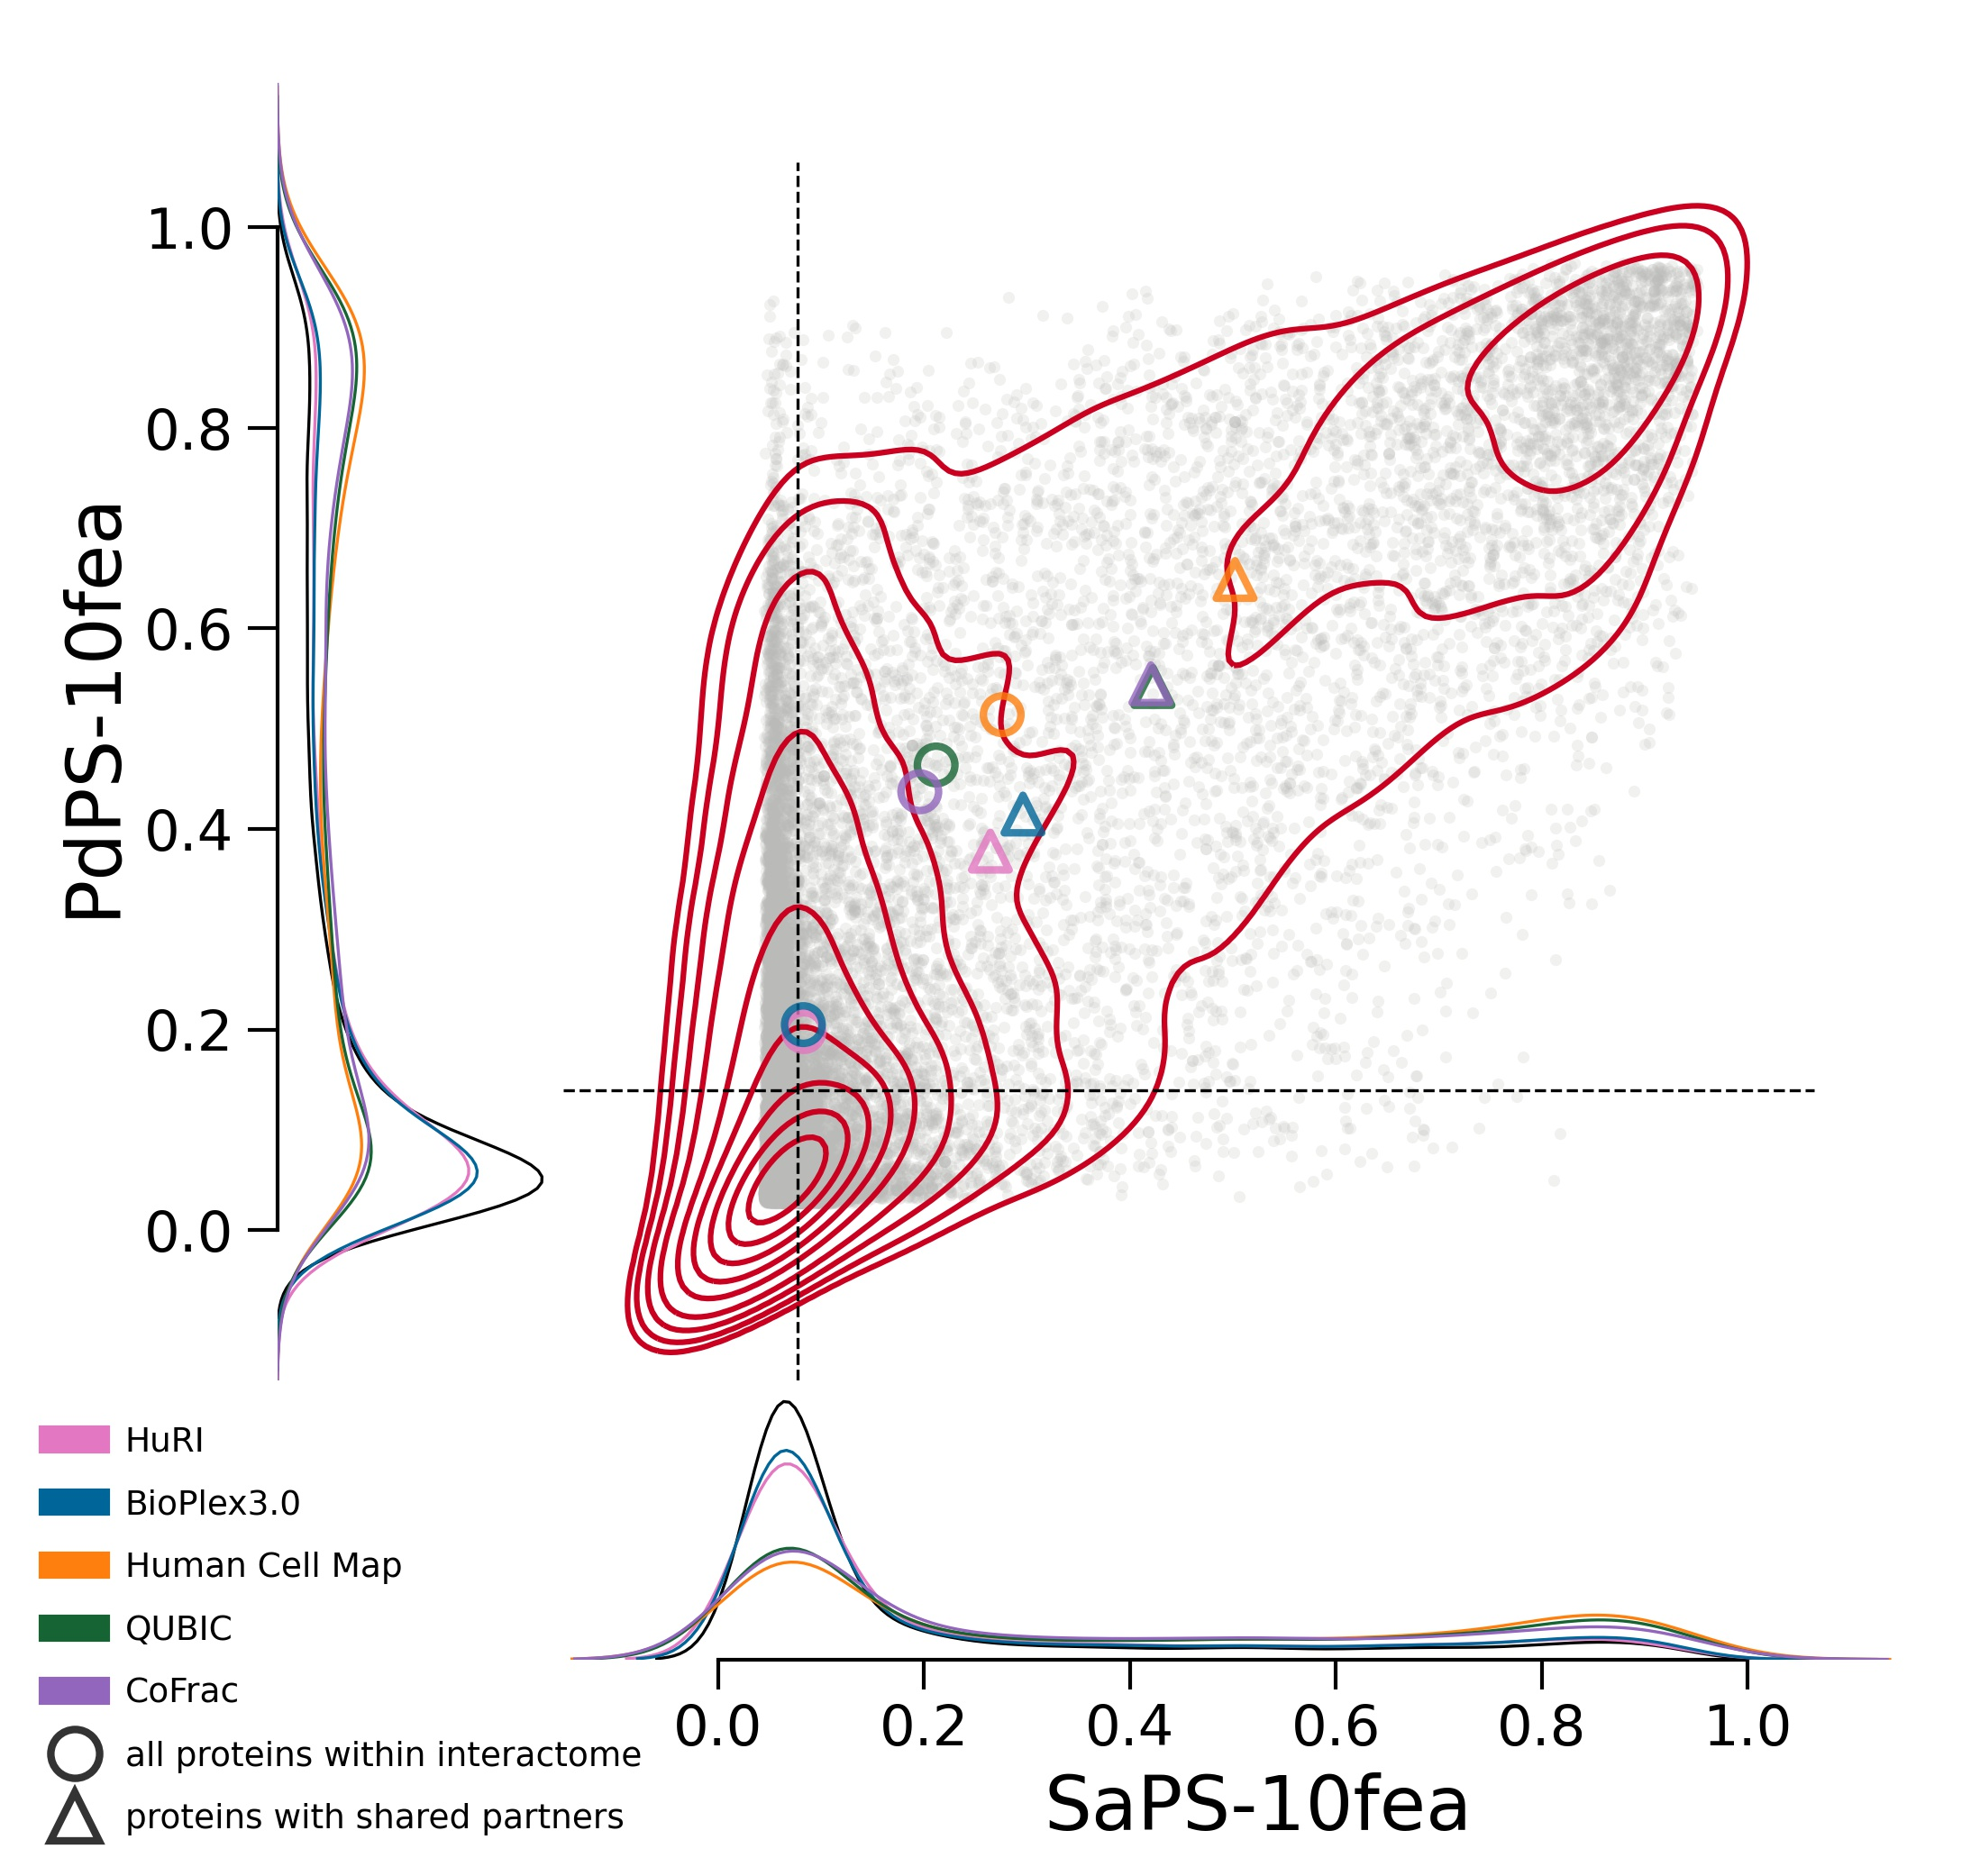

In [218]:
fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(
    nrows=2, 
    ncols=2, 
    figsize=(8, 8),
    sharex='col',
    sharey='row',
    gridspec_kw={'height_ratios': [5, 1], 'width_ratios': [1, 5]}
)
plt.subplots_adjust(wspace=.01, hspace=.01)
axs = [ax1, ax2, ax3, ax4]
x, y = 'SaPS-10fea', 'PdPS-10fea'

# scatterplot & kdeplot (ax2)
sns.scatterplot(x=x, y=y, data=dat_plt3, 
                linewidth=0, alpha=.2, 
                s=10, color='#BABAB8', ax=ax2)
sns.kdeplot(x=x, y=y, data=dat_plt3, 
            color='#C9001F', ax=ax2)
ax2.set_xlim([-.15, 1.2])
ax2.set_ylim([-.15, 1.2])
ax2.set_xticks([round(i, 2) for i in np.arange(0, 1.2, .2)])
ax2.set_yticks([round(i, 2) for i in np.arange(0, 1.2, .2)])
for c in ['top', 'bottom', 'left', 'right']:
    ax2.spines[c].set_visible(None)
ax2.tick_params(bottom=False, left=False)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
color_dotline = 'k'
# highest density
# ax2.axvline(x=estimate_maxima(dat_plt2[x]), ymin=.0, ymax=.9, ls='--', color=color_dotline, linewidth=.8)
# ax2.axhline(y=estimate_maxima(dat_plt2[y]), xmin=.0, xmax=.9, ls='--', color=color_dotline, linewidth=.8)
# median
ax2.axvline(x=dat_plt3[x].median(), ymin=.0, ymax=.9, ls='--', color=color_dotline, linewidth=.8)
ax2.axhline(y=dat_plt3[y].median(), xmin=.0, xmax=.9, ls='--', color=color_dotline, linewidth=.8)

# legend (ax3)
# without border
for c in ['top', 'bottom', 'left', 'right']:
    ax3.spines[c].set_visible(None)
ax3.tick_params(bottom=False, left=False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
# color legend
interactome2color_dict = {
    'HuRI': '#E377C1',
    'BioPlex3.0': '#006699',
    'Human Cell Map': '#FF7F0E',
    'QUBIC': '#166433',
    'CoFrac': '#9366BD'
}
red_patches = [mpatches.Patch(color=val, label=key) for key, val in interactome2color_dict.items()]
# dot legend
markerfacecolor = 'k'
MARKERSIZE = 13
FONTSIZE = 9
line1 = Line2D([], [], 
               alpha=.8, 
               linewidth=0, 
               label='all proteins within interactome', 
               marker='o', 
               markersize=MARKERSIZE,
               markeredgewidth=2, 
               markeredgecolor=markerfacecolor,
               markerfacecolor='none')
line2 = Line2D([], [], 
               alpha=.8,
               linewidth=0,
               label='proteins with shared partners',
               marker='^',
               markersize=MARKERSIZE,
               markeredgewidth=2,
               markeredgecolor=markerfacecolor,
               markerfacecolor='none')
handles = red_patches + [line1, line2]
ax3.legend(handles=handles, ncol=1, loc=[-.9, -.7], 
           frameon=False, fontsize=FONTSIZE, handletextpad=.5, labelspacing=.9)

# PdPS kdeplot (ax1)
linewidth_kde, linewidth_axis = .8, 1
color_kde, color_axis = 'k', 'k'
sns.kdeplot(y=y, data=dat_plt3, ax=ax1, color=color_kde, linewidth=linewidth_kde)
for c in ['top', 'bottom', 'left', 'right']:
    ax1.spines[c].set_visible(None)
ax1.tick_params(bottom=False, length=8, width=linewidth_axis)
ax1.set_xlabel(None)
ax1.set_xticklabels([])
ax1.set_yticklabels([round(i, 2) for i in np.arange(0, 1.2, .2)], size=15)
# ax1.set_ylim([0, 1])
ax1.set_ylabel(y, size=20)
# adding vertical axis
trans = ax1.get_yaxis_transform()
ax1.plot([.0, .0], [1, .0], color=color_axis, linewidth=linewidth_axis, transform=trans, clip_on=False)

# SaPS kdeplot (ax4)
sns.kdeplot(x=x, data=dat_plt3, ax=ax4, color=color_kde, linewidth=linewidth_kde)
for c in ['top', 'bottom', 'left', 'right']:
    ax4.spines[c].set_visible(None)
ax4.tick_params(left=False, length=8, width=linewidth_axis)
ax4.set_ylabel(None)
ax4.set_yticklabels([])
ax4.set_xticklabels([round(i, 2) for i in np.arange(0, 1.2, .2)], size=15)
# ax4.set_xlim([0, 1])
ax4.set_xlabel(x, size=20)
# adding horizontal axis
trans = ax4.get_xaxis_transform()
ax4.plot([.0, 1], [.0, .0], color=color_axis, linewidth=linewidth_axis, transform=trans, clip_on=False)

# Median Dots & kdeplot
ALPHA = .8
SIZE = 100

for key, val in interactome2PhaSePred_dict.items():
    # all proteins
    ax2.scatter(
        x=val[x].median(), 
        y=val[y].median(), 
        edgecolor=interactome2color_dict[key], 
        facecolor='none', alpha=ALPHA, s=SIZE, 
        linewidth=2, marker='o', zorder=5
    )
    # median phasepred with shared binding partners
    ax2.scatter(
        x=inter2MedPhasepred_dict[key]['saps'], 
        y=inter2MedPhasepred_dict[key]['pdps'], 
        edgecolor=interactome2color_dict[key], 
        facecolor='none', alpha=ALPHA, s=SIZE, 
        linewidth=2, marker='^', zorder=5
    )
    DatPlot = val[['entry', x, y]].copy()
    sns.kdeplot(y=y, data=DatPlot, ax=ax1, color=interactome2color_dict[key], linewidth=linewidth_kde)
    sns.kdeplot(x=x, data=DatPlot, ax=ax4, color=interactome2color_dict[key], linewidth=linewidth_kde)

# # median phasepred with shared baits
# for s in ['BioPlex3.0', 'Human Cell Map', 'QUBIC']:
#     ax2.scatter(
#         x=interactome2PreyPhaSePred_df[(interactome2PreyPhaSePred_df['interactome']==s)&
#                        (interactome2PreyPhaSePred_df['fea']==x)]['prey.score.median'].item(), 
#         y=interactome2PreyPhaSePred_df[(interactome2PreyPhaSePred_df['interactome']==s)&
#                        (interactome2PreyPhaSePred_df['fea']==y)]['prey.score.median'].item(),
#         facecolor='none', alpha=ALPHA, s=SIZE, edgecolor=interactome2color_dict[s], 
#         marker='^', linewidth=2
#     )